Question:

The boundary and initial conditions of an aluminium rod are:

$$T(x,0) = 0^{\circ}C \; \; where \; \; 0\leq x\leq 10$$

$$T(0,t) = 100^{\circ}C$$

$$T(10,t) = 50^{\circ}C$$

Given the thermal conductivity of aluminium $k=0.49$, density $\rho=2.7$ and heat capacity $C=0.2174$, solve the temperature distributions over time assuming $\Delta x=2$ and $\Delta t=0.1$.

Question from: https://www.youtube.com/watch?v=YCOwkNXMmEM

Conduction Equation used: $$\alpha \frac{\partial^2 T}{\partial x^2} = \frac{\partial T}{\partial t}$$

Discretization: $$-\lambda T^{n+1}_{i-1} + 2(1+\lambda)T_i^{n+1} - \lambda T^{n+1}_{i+1} = \lambda T_{i-1}^n + 2(1-\lambda)T_i^{n} + \lambda T^n_{i+1}$$

where $\lambda = \alpha \frac{\Delta t}{\Delta x^2}$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Initializing the variables
x=10
dx=2
nx=6

nt=1
dt=0.1

k=0.49
rho=2.7
C=0.2174
lamda=k/(C*rho)*dt/dx**2
print(lamda)

T_init=np.zeros(nx)
xarr=np.linspace(0,x,nx)
print(xarr)

0.020869535588946813
[ 0.  2.  4.  6.  8. 10.]


In [9]:
#Boundary conditions
Tleft=100
Tright=50
T_init[0]=Tleft
T_init[-1]=Tright
print(T_init)

[100.   0.   0.   0.   0.  50.]


In [10]:
#Implicit numerical solution using TDMA

#Lower Diagonal matrix
a=[-lamda]*3+[0]

#Middle Diagonal matrix
b=[2+lamda*2]*4

#Upper Diagonal Matrix
c=[0]+[-lamda]*3

#Right hand side of the system
d=[100*lamda*2]+[0]*2+[lamda*50*2]

print(a, b, c, d)

[-0.020869535588946813, -0.020869535588946813, -0.020869535588946813, 0] [2.0417390711778935, 2.0417390711778935, 2.0417390711778935, 2.0417390711778935] [0, -0.020869535588946813, -0.020869535588946813, -0.020869535588946813] [4.173907117789363, 0, 0, 2.0869535588946815]


Iteration:  1
[2.04429017 0.02100461 0.01066362 1.02225408]


Iteration:  2
[2.02339456 0.031132   0.01588424 1.01191303]


Iteration:  3
[2.01316034 0.03601368 0.01843959 1.00687432]


Iteration:  4
[2.00814784 0.03836617 0.0196901  1.00441925]


Iteration:  5
[2.00569282 0.03949954 0.02030192 1.00322306]


Iteration:  6
[2.00449041 0.0400454  0.02060121 1.00264025]


Iteration:  7
[2.00390149 0.04030823 0.02074757 1.0023563 ]


Iteration:  8
[2.00361305 0.04043474 0.02081914 1.00221796]


Iteration:  9
[2.00347178 0.04049562 0.02085412 1.00215056]


Iteration:  10
[2.00340259 0.0405249  0.02087122 1.00211772]




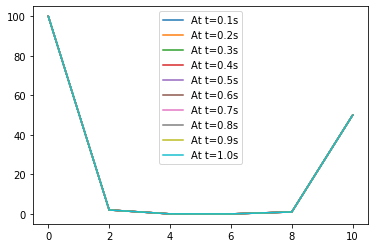

In [11]:
def TDMAAlgo(a,b,c,d):
    n = len(d)
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

labels = {1: "At t=0.1s", 2: "At t=0.2s", 3: "At t=0.3s", 4: "At t=0.4s", 5: "At t=0.5s", 6: "At t=0.6s", 7: "At t=0.7s", 8: "At t=0.8s", 9: "At t=0.9s", 10: "At t=1.0s"}
for it in range(0, 10):
    T_comp=TDMAAlgo(a,b,c,d)
    print("Iteration: ", it+1)
    print(T_comp)
    print("\n")
    d = [T_comp[0] + lamda*100, T_comp[1], T_comp[2], T_comp[3] + lamda*50]
    to_plot = [100] + list(T_comp) + [50]
    plt.plot(xarr, to_plot, label=labels[it+1])
    plt.legend()